# 哈勃常数测定实验报告
## 数据采集和处理

In [1]:
#raw data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
Obmag=np.array([15.60,15.40,16.00,16.3,12.90,12.50,14.10,14.40])
ObK=np.array([4128.33,4133.33,4205.00,4223.33,4026.67,4018.33,4086.67,4108.33])
ObH=np.array([4166.67,4170.00,4243.33,4261.67,4063.33,4055.00,4123.33,4143.33])
ph_c=[269892,384604,133606,148862,321168,274570,207228,76964]
K=3933.7
H=3968.5

In [2]:
#Distance(Mpc)
D=10**((Obmag+21)/5-5)

In [3]:
#redshift(km/s)
vK=2.997*(10**5)*((ObK-K)/K)
vH=2.997*(10**5)*((ObH-H)/H)
v=(vK+vH)/2

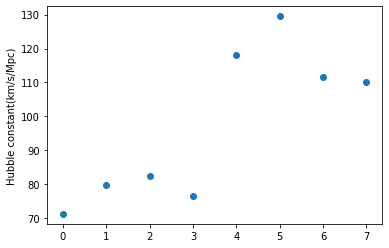

In [4]:
#Hubble constant（using model "v=HD" instead of "v=HD+b"）
H=v/D
plt.ylabel("Hubble constant(km/s/Mpc)")
plt.scatter(range(8),H)

C:\Users\sunqi008\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
C:\Users\sunqi008\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


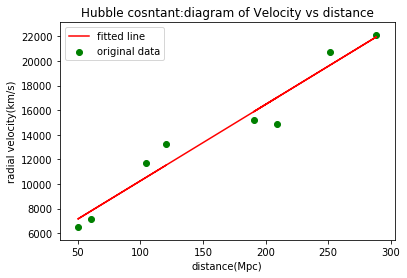

62.10648185313956 4039.825515862937 [11302245.52738378] 0.9492327737016796


In [5]:
#analysis
plt.xlabel("distance(Mpc)")
plt.ylabel("radial velocity(km/s)")
A = np.vstack([D, np.ones(len(D))]).T
k,b=np.linalg.lstsq(A,v)[0]
t=np.linalg.lstsq(A,v)[1]
plt.plot(D,k*D+b,color="red",label="fitted line")
plt.scatter(D,v, color = 'green',label="original data")
plt.legend()
plt.title("Hubble cosntant:diagram of Velocity vs distance")
plt.show()
r2=r2_score(v,k*D+b)
print(k,b,t,r2)

+ 其中斜率就取为哈勃常数的值，$H_0$=62.10(km/s)/Mpc，和我们在一般文献中取得的$H_0=70km/s/Mpc$相差没有很大
+ 计算得到$\chi^2=11302245.53$,$R^2=0.9492$,显然相关性很好！

In [6]:
##数据总表
data={"photon count":ph_c,"Observed mag":Obmag,"distance(Mpc)":D,"Observed K wavelength":ObK,"Observed H wavelength":ObH,"velocity K":vK,"velocity H":vH,"average velocity(km/s)":v,"Hubble constant":H}
df=pd.DataFrame(data)
df

,photon count,Observed mag,distance(Mpc),Observed K wavelength,Observed H wavelength,velocity K,velocity H,average velocity(km/s),Hubble constant
0,269892,15.6,208.929613,4128.33,4166.67,14828.434044,14965.742472,14897.088258,71.301947
1,384604,15.4,190.546072,4133.33,4170.00,15209.373109,15217.223132,15213.298121,79.840523
2,133606,16.0,251.188643,4205.00,4243.33,20669.753667,20755.084037,20712.418852,82.457625
3,148862,16.3,288.403150,4223.33,4261.67,22066.276279,22140.115661,22103.195970,76.639926
4,321168,12.9,60.255959,4026.67,4063.33,7083.180975,7161.534837,7122.357906,118.201719
5,274570,12.5,50.118723,4018.33,4055.00,6447.774614,6532.455588,6490.115101,129.494821
6,207228,14.1,104.712855,4086.67,4123.33,11654.449755,11692.717903,11673.583829,111.481860
7,76964,14.4,120.226443,4108.33,4143.33,13304.677784,13203.112259,13253.895022,110.241097


## 实验过程
+ 登录进入虚拟天文台，选择并打开一个望远镜；
+ 利用系统，找到8个感兴趣的源（取源时保证他们的位置较为分散）；
+ 进行光谱测量的工作。当光子数超过40，000时，或者能看到清晰的H/K吸收线时，停止测量，记录下H/K线的位置。再记录下光子数和观测星等；
+ 对8个源重复上述操作；
+ 进行数据分析：利用观测星等和绝对星等（这里都取-21）之间的关系，计算得到星系离我们的距离D：$$lgD=\frac{m-M+5}{5}$$，其中D的单位是pc，我们后面把它换为Mpc；
+ 利用H/K吸收线的红移关系：$$z=\frac{\lambda_{obs}-\lambda_{rest}}{\lambda_{rest}}$$计算得到K/H的红移关系；
+ 利用多普勒效应公式：$$v=c\cdot z$$ 计算得到星系的退行速度；
+ 由哈勃定律：$$v=H_0D$$,以星系的退行速度作为横坐标，以星系离我们的距离作为纵坐标，画出散点图；
+ 对散点图进行拟合，以拟合直线的斜率作为哈勃常数的值，并计算得到$\chi^2$和$R^2$的值作为拟合优度的参考。


## 宇宙年龄
由以上结果,由哈勃定律：$$v=H_0D$$,其中$H_0$=62.10(km/s)/Mpc，则一个处于800kpc的星系的退行速度：$$v=H_0D=62.10\times800\div1000km/s=49.68km/s$$

单位换算： $$800Mpc=800\times10^3\times3.086\times10^{13}km=2.47\times10^{19}km$$
宇宙开始的时间： $$D\div v=2.47\times10^{22}\div 49.68second=4.97\times10^{17}second=15.75billion\ years$$

## 思考与讨论
+ 再测K和H吸收谱线时，一定准确找到两个吸收谱线的位置，因为他们之间波长差在40埃左右。
+ 在前面拟合的过程中，我使用的是$v=H_0D+const.$的模型,从而估计出$H_0$的值。而到了下面估算宇宙的年龄，我又使用哈勃定律$v=H_0D$来求出退行速度。这样做可能有些不妥。对于这一点我还要做进一步的思考。
+ 总结：本实验使用视向速度和距离之间的关系测量得到哈勃常数的值。利用视星等和绝对星等的关系测定距离；利用K和H谱线的红移测定星系远离我们的速度。利用简单的方法，还估计了宇宙的年龄，和现代公认的值相近。本实验还包含了测定谱线红移，测光等操作，让我们对天文规律发现的过程有了一定的了解，加深了我们对哈勃定律的理解和认识。